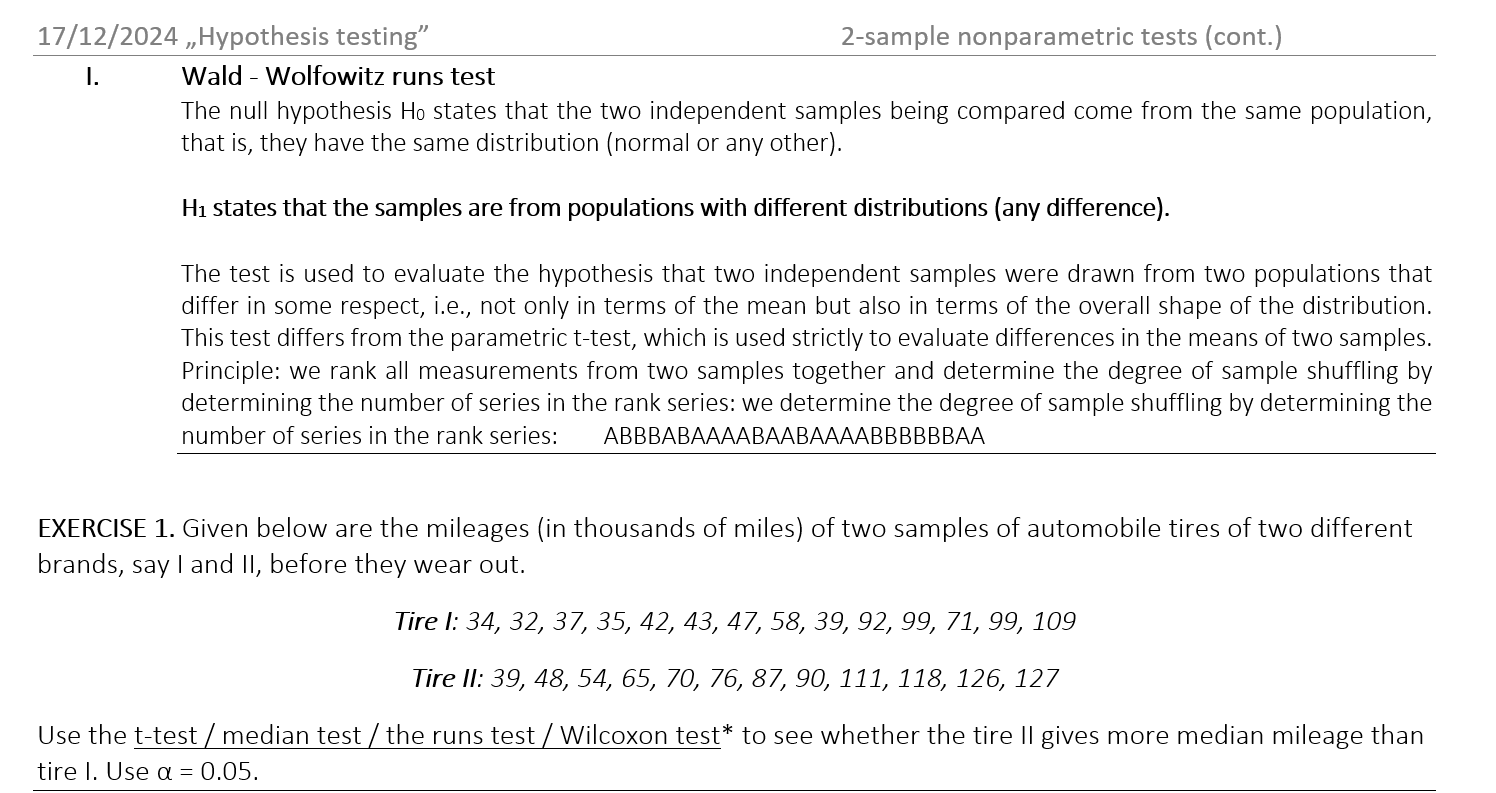

In [45]:
import numpy as np
import pandas as pd
from statsmodels.sandbox.stats.runs import runstest_1samp
from scipy.stats import ttest_ind, ranksums, median_test
from scipy.stats import binomtest


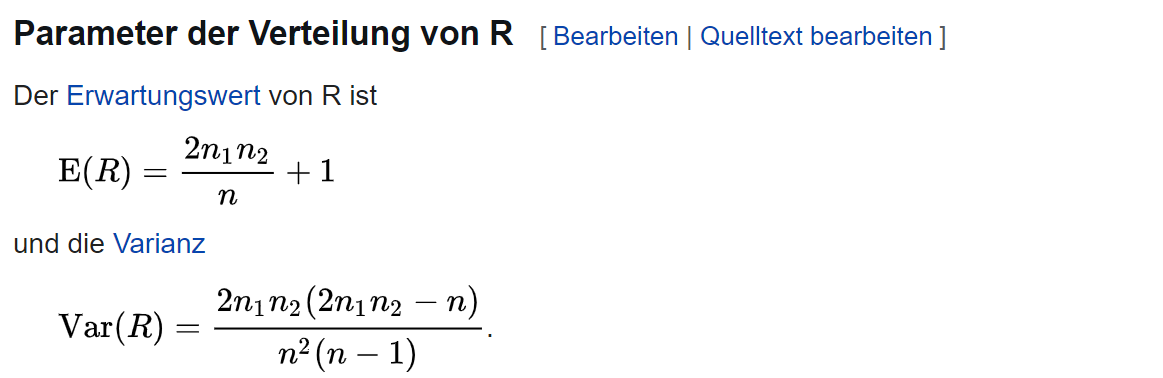
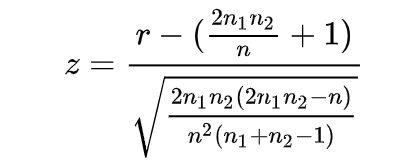

In [39]:
tire_I = [34, 32, 37, 35, 42, 43, 47, 58, 39, 92, 99, 71, 99, 109]
tire_II = [39, 48, 54, 65, 70, 76, 87, 90, 111, 118, 126, 127]

data = pd.DataFrame({
    "Mileage": tire_I + tire_II,
    "Group": ['A'] * len(tire_I) + ['B'] * len(tire_II)
})

data["Rank"] = data["Mileage"].rank(method="average")

data = data.sort_values("Rank").reset_index(drop=True)
print(data)

    Mileage Group  Rank
0        32     A   1.0
1        34     A   2.0
2        35     A   3.0
3        37     A   4.0
4        39     A   5.5
5        39     B   5.5
6        42     A   7.0
7        43     A   8.0
8        47     A   9.0
9        48     B  10.0
10       54     B  11.0
11       58     A  12.0
12       65     B  13.0
13       70     B  14.0
14       71     A  15.0
15       76     B  16.0
16       87     B  17.0
17       90     B  18.0
18       92     A  19.0
19       99     A  20.5
20       99     A  20.5
21      109     A  22.0
22      111     B  23.0
23      118     B  24.0
24      126     B  25.0
25      127     B  26.0


array([<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
      dtype=object)

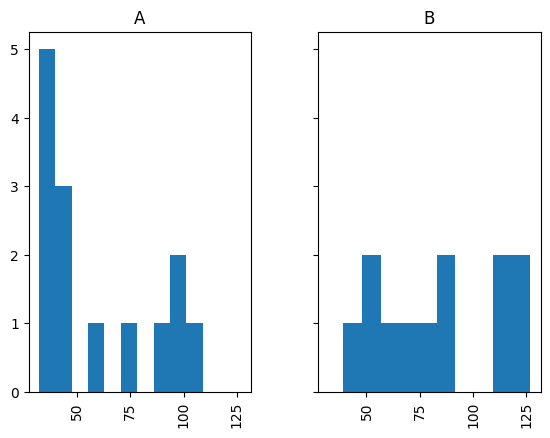

In [40]:
data.hist(column="Mileage", by="Group", bins=10, sharex=True, sharey=True)

In [41]:
binary_groups = data["Group"].apply(lambda x: 1 if x == 'A' else 0)

z_stat, p_value = runstest_1samp(binary_groups, correction=True)

print("Wald-Wolfowitz runs test result:")
print("Z statistic:", z_stat)
print("p-value:", p_value)

Wald-Wolfowitz runs test result:
Z statistic: -1.3788261943940427
p-value: 0.16794834834500405


In [42]:
t_stat, t_p_value = ttest_ind(tire_II, tire_I, alternative='greater')

median_stat, median_p_value, _, _ = median_test(tire_I, tire_II)

wilcoxon_stat, wilcoxon_p_value = ranksums(tire_II, tire_I, alternative='greater')

# Results
{
    "T-Test (p-value)": t_p_value,
    "Median Test (p-value)": median_p_value,
    "Wilcoxon Test (p-value)": wilcoxon_p_value
}

{'T-Test (p-value)': 0.02265352580057545,
 'Median Test (p-value)': 0.237923188633695,
 'Wilcoxon Test (p-value)': 0.018621272297989672}

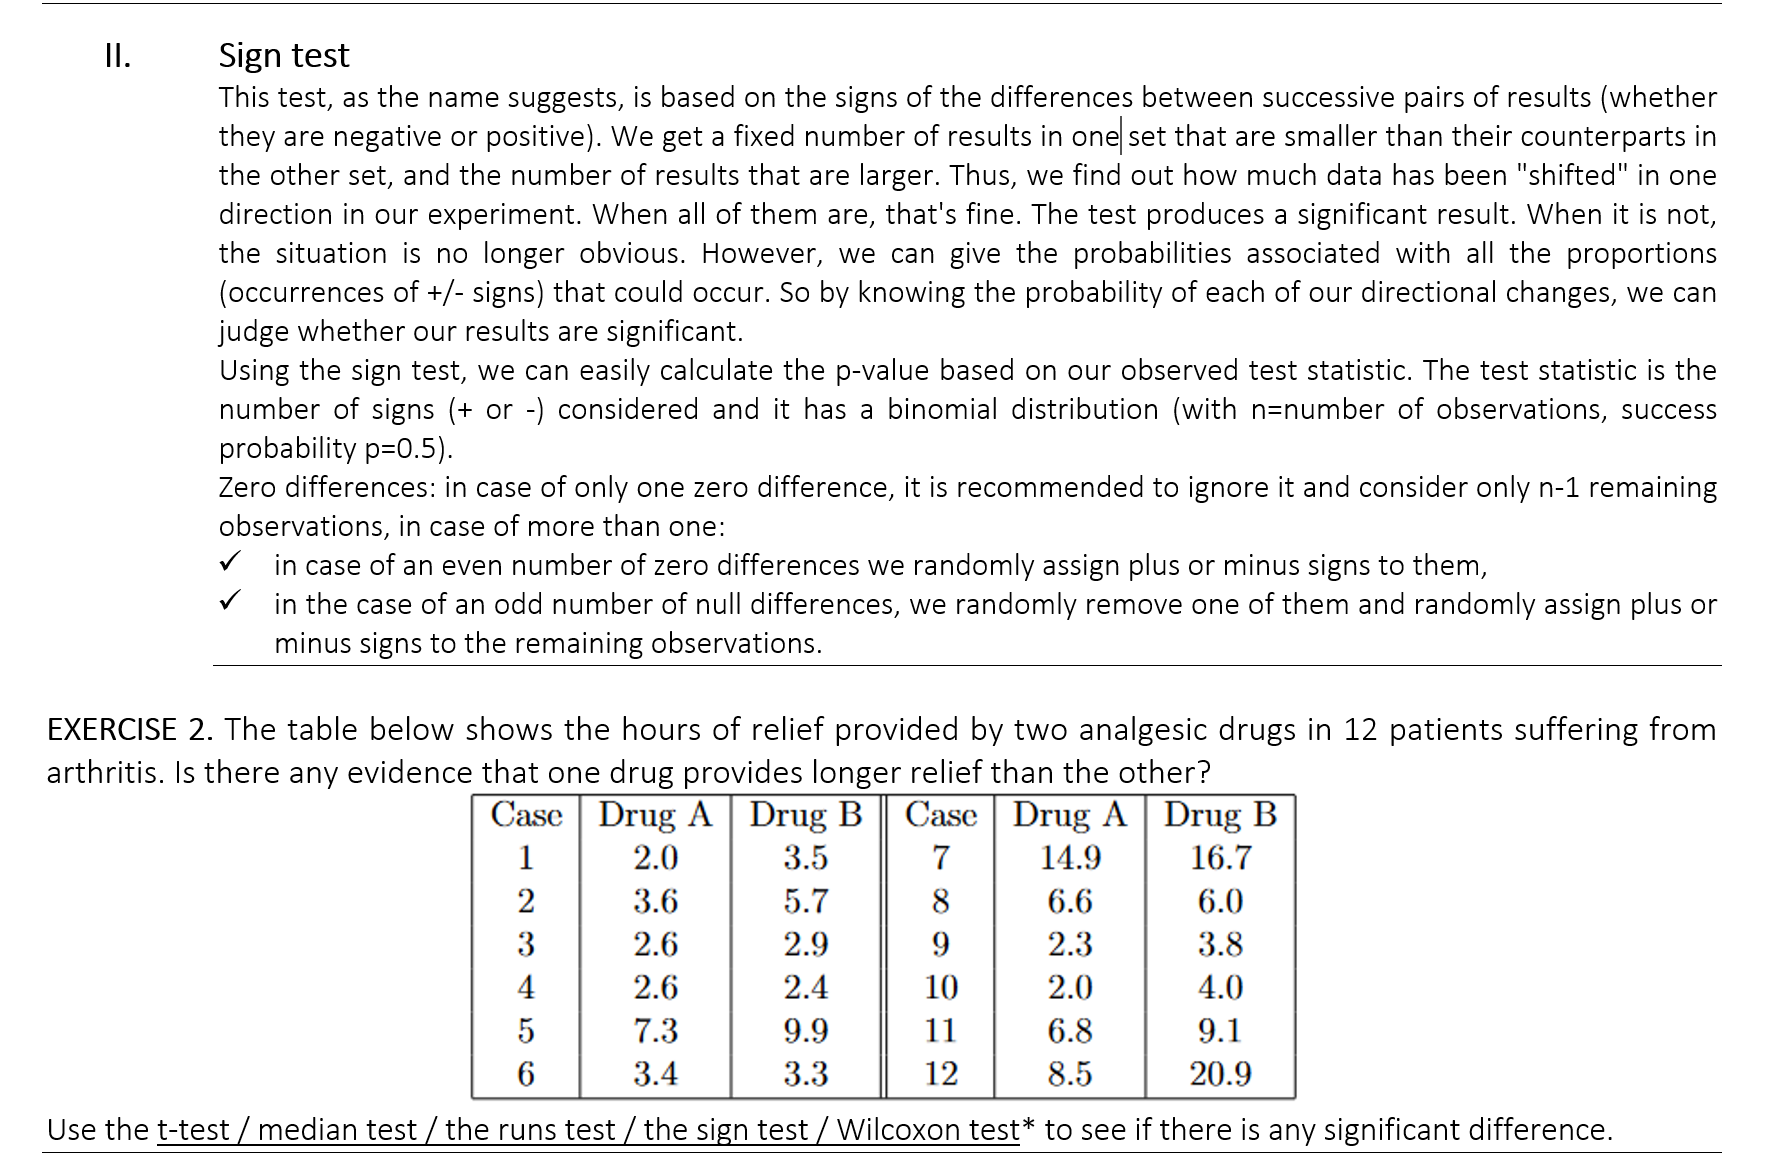

In [47]:
drugA = np.array([2,3.6,2.6,2.6,7.3,3.4,14.9,6.6,2.3,2,6.8,8.5])
drugB = np.array([3.5,5.7,2.9,2.4,9.9,3.3,16.7,6,3.8,4,9.1,20.9])

data = pd.DataFrame({
    'DrugA': drugA,
    'DrugB': drugB
})

print(data)

    DrugA  DrugB
0     2.0    3.5
1     3.6    5.7
2     2.6    2.9
3     2.6    2.4
4     7.3    9.9
5     3.4    3.3
6    14.9   16.7
7     6.6    6.0
8     2.3    3.8
9     2.0    4.0
10    6.8    9.1
11    8.5   20.9


In [54]:

num_positive = (non_zero_data['Difference'] > 0).sum()
num_negative = (non_zero_data['Difference'] < 0).sum()

test_statistic = min(num_positive, num_negative)
p_value = binomtest(test_statistic, n=n, p=0.5, alternative='two-sided').pvalue

print("Sign test result:")
print("Number of positive signs:", num_positive)
print("Number of negative signs:", num_negative)
print("Test statistic:", test_statistic)
print("p-value:", p_value)


Sign test result:
Number of positive signs: 3
Number of negative signs: 9
Test statistic: 3
p-value: 0.14599609375


In [56]:
t_stat, t_p_value = ttest_ind(drugA, drugB, alternative='greater')

median_stat, median_p_value, _, _ = median_test(drugA, drugB)

wilcoxon_stat, wilcoxon_p_value = ranksums(drugA, drugB, alternative='greater')

# Results
{
    "T-Test (p-value)": t_p_value,
    "Median Test (p-value)": median_p_value,
    "Wilcoxon Test (p-value)": wilcoxon_p_value
}

{'T-Test (p-value)': 0.8470717457801351,
 'Median Test (p-value)': 0.6830913983096086,
 'Wilcoxon Test (p-value)': 0.8873271531491667}